In [1]:
import os
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import wordpunct_tokenize
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

% matplotlib inline

In [2]:
#  path to resume
resume = os.getcwd()+'/resume.txt'
# Opening resume, it is only opening and nothing else will happen
resume_open = open(resume)

In [3]:
resume_read = resume_open.read()
print(resume_read)

FISAYO DADA
(518) 322 8373 | fis.dada@gmail.com | Kearny, NJ, 07032
https://www.linkedin.com/in/olufisayo-dada/

Data Scientist with 5+ years of professional experience and legally authorized to work in the U.S.

EDUCATION
University of New Hampshire - Durham, NH   	Master of Science (M.S), Analytics & Data Science    2018
University of Lagos - Lagos, Nigeria 		Bachelor of Science (B.S), Mechanical Engineering    2009		                  
 
PROFESSIONAL SUMMARY
 
•	Proficiency with Natural language processing (NLP) techniques, such as pre-processing, semantic analysis, modeling and word representations.
•	Strong understanding of Hadoop distributed file system and other big data tools such as Amazon AWS, MapReduce, Microsoft Azure, NoSQL, Hive, Spark.
•	Experience with developing and validating deep learning and neural network models.
•	Develop business intelligence tools using Tableau, Power BI, QlikView, Python and R.
 
 
EXPERIENCE

UNH CAREER AND PROFESSIONAL SUCCESS 
Data Scientist 

In [4]:
#tokenize
tokens = wordpunct_tokenize(resume_read)

In [5]:
print(len(tokens))
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(len(words))
print(words[:10])

849
608
['FISAYO', 'DADA', 'fis', 'dada', 'gmail', 'com', 'Kearny', 'NJ', 'https', 'www']


In [6]:
# Create and extend the stop list
stop_en = stopwords.words('english')
stop_en.extend([".","-","(", ")","/","|", ",", "’", "”","“"])

In [7]:
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [8]:
words_lower = []

# loop through document list
for i in words:
    
    # make all tokens lower case
    raw = i.lower()
    
     # add tokens to list
    words_lower.append(raw)

print(len(words))
print(len(words_lower))

608
608


In [9]:
# remove stop words from tokens
words_stopped = [i for i in words_lower if not i in stop_en]

In [10]:
 # stem tokens
words_stemmed = [p_stemmer.stem(i) for i in words_stopped]

In [10]:
#I did not use the stemmed words for easier interpretation in the graphs
df = pd.DataFrame({'Frequency' : [], 'Word' : []})
uniqWords = sorted(set(words_stopped)) #remove duplicate words and sort
for word in uniqWords:
    temp = []
    temp.append(words_stopped.count(word))
    temp.append(word)
    df.loc[len(df.index)] = temp  

In [11]:
df = df[["Word","Frequency"]]

In [12]:
df = df.sort_values(by = ["Frequency"], ascending = False)

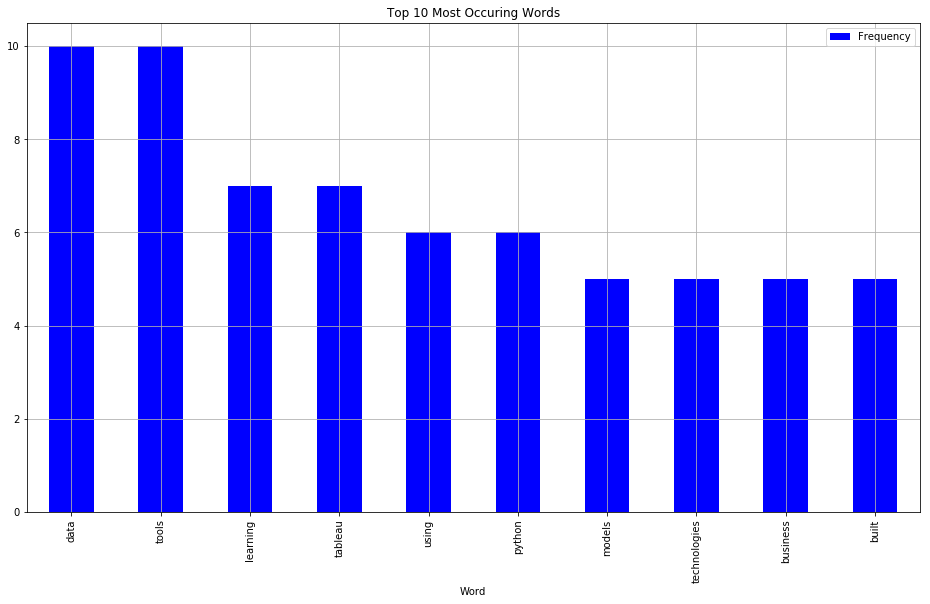

In [13]:
df_top10 = df.head(10)
df_top10.plot(kind='bar', title="Top 10 Most Occuring Words",x="Word",y="Frequency",grid=True,color='blue', figsize=(16, 9))

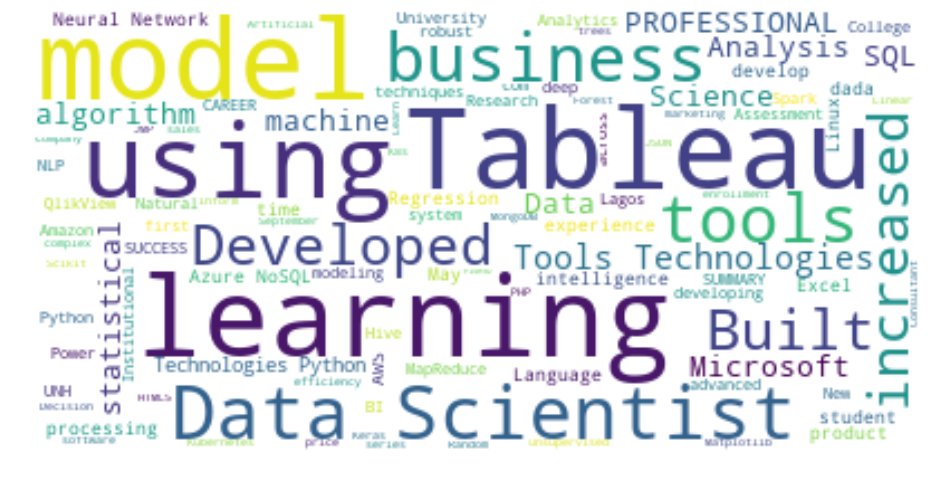

In [14]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_en, max_font_size=50, max_words=100, background_color="white").generate(resume_read)
# Display the generated image:
plt.figure(figsize(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()